In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from sklearn.model_selection import train_test_split
from keras.callbacks import History 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib
import math

In [3]:
scaler = joblib.load("../scaler.save")
data_train = "../train_next_day.h5"
data_test = "../test_next_day.h5"
train = pd.read_hdf(data_train)
test = pd.read_hdf(data_test)
train.head(50)

Adj Close  sentiment      sec0      sec1      sec2      sec3  \
Date                                                                       
2012-05-18  -0.638193  -0.076487  0.000000  0.000000  0.000000  0.000000   
2012-05-21  -0.712319   0.043950  0.000000  0.000000  0.000000  0.000000   
2012-05-22  -0.765796  -0.182019  0.000000  0.000000  0.000000  0.000000   
2012-05-23  -0.748147   0.000000  0.000000  0.000000  0.000000  0.000000   
2012-05-24  -0.729968  -0.126471  0.000000  0.000000  0.000000  0.000000   
2012-05-25  -0.749735   0.066473  0.000000  0.000000  0.000000  0.000000   
2012-05-29  -0.803918   0.000000  0.000000  0.000000  0.000000  0.000000   
2012-05-30  -0.815390   0.208429  0.000000  0.000000  0.000000  0.000000   
2012-05-31  -0.790505   0.000000  0.000000  0.000000  0.000000  0.000000   
2012-06-01  -0.823685   0.037900  0.000000  0.000000  0.000000  0.000000   
2012-06-04  -0.838157   0.069154  0.000000  0.000000  0.000000  0.000000   
2012-06-05  -0.856336  -0.124035  0.000000  0.000000  0.000000  0.000000   
2012-06-06  -0.839746   0.000000  0.000000  0.000000  0.000000  0.000000   
2012-06-07  -0.848570   0.039940  0.000000  0.000000  0.000000  0.000000   
2012-06-08  -0.834628   0.084425  0.000000  0.000000  0.000000  0.000000   
2012-06-11  -0.836216   0.070820  0.000000  0.000000  0.000000  0.000000   
2012-06-12  -0.829333   0.000000  0.000000  0.000000  0.000000  0.000000   
2012-06-13  -0.831627   0.102120  0.000000  0.000000  0.000000  0.000000   
2012-06-14  -0.813625   0.154394  0.000000  0.000000  0.000000  0.000000   
2012-06-15  -0.783269   0.190435  0.000000  0.000000  0.000000  0.000000   
2012-06-18  -0.758560   0.121989  0.000000  0.000000  0.000000  0.000000   
2012-06-19  -0.749735   0.000000  0.000000  0.000000  0.000000  0.000000   
2012-06-20  -0.755207   0.055952  0.000000  0.000000  0.000000  0.000000   
2012-06-21  -0.750971   0.178324  0.000000  0.000000  0.000000  0.000000   
2012-06-22  -0.729615   0.000000  0.000000  0.000000  0.000000  0.000000   
2012-06-25  -0.747088   0.000000  0.403492 -1.199431  0.132970  0.316648   
2012-06-26  -0.728733   0.085995  0.000000  0.000000  0.000000  0.000000   
2012-06-27  -0.744088   0.015264  0.000000  0.000000  0.000000  0.000000   
2012-06-28  -0.759442   0.000000  0.000000  0.000000  0.000000  0.000000   
2012-06-29  -0.764031   0.156420  0.000000  0.000000  0.000000  0.000000   
2012-07-02  -0.769855   0.000000  0.000000  0.000000  0.000000  0.000000   
2012-07-03  -0.762266  -0.219795  0.000000  0.000000  0.000000  0.000000   
2012-07-05  -0.757501   0.000000  0.000000  0.000000  0.000000  0.000000   
2012-07-06  -0.752912   0.252233  0.000000  0.000000  0.000000  0.000000   
2012-07-09  -0.745147   0.016858  0.000000  0.000000  0.000000  0.000000   
2012-07-10  -0.757501  -0.012550  0.000000  0.000000  0.000000  0.000000   
2012-07-11  -0.766325   0.000000  0.000000  0.000000  0.000000  0.000000   
2012-07-12  -0.769149   0.021575  0.000000  0.000000  0.000000  0.000000   
2012-07-13  -0.770738   0.066332  0.000000  0.000000  0.000000  0.000000   
2012-07-16  -0.814331   0.214792  0.000000  0.000000  0.000000  0.000000   
2012-07-17  -0.817155   0.000000  0.000000  0.000000  0.000000  0.000000   
2012-07-18  -0.799153   0.090390  0.000000  0.000000  0.000000  0.000000   
2012-07-19  -0.801094   0.078667  0.000000  0.000000  0.000000  0.000000   
2012-07-20  -0.805330   0.000000  0.000000  0.000000  0.000000  0.000000   
2012-07-23  -0.805507   0.000000  0.000000  0.000000  0.000000  0.000000   
2012-07-24  -0.810801  -0.070147  0.000000  0.000000  0.000000  0.000000   
2012-07-25  -0.795094   0.069650  0.000000  0.000000  0.000000  0.000000   
2012-07-26  -0.839040   0.000000  0.317928 -0.670532 -0.414336  0.698862   
2012-07-27  -0.894458   0.154111  0.000000  0.000000  0.000000  0.000000   
2012-07-30  -0.904342   0.082233  0.000000  0.000000  0.000000  0.000000   

                sec4      sec5      sec6      sec7       ..

In [4]:
def create_data(df, time_steps, features):
    num_data = df.shape[0]
    df2 = df.values
    sequences = num_data - time_steps + 1
    x = np.zeros((sequences, time_steps, features))
    y = np.zeros((sequences))
    dates = []
    for seq in range(sequences):
        x[seq, :, :] = df2[seq:seq+time_steps,:features]
        y[seq] = df2[seq+time_steps-1, features]
        dates.append(df.index[seq+time_steps-1])
    return x,  y, dates

In [5]:
x_train, y_train, _ = create_data(train, 40, 52)

In [6]:
x_test, y_test, dates = create_data(test, 40, 52)

In [7]:
model = Sequential()
model.add(LSTM(100,
               return_sequences=False, 
               input_shape=(40,52)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='mean_squared_error',
             optimizer=adam,
             metrics=['mse'])


In [48]:
history = History()
model.fit(x_train, y_train, epochs=80, batch_size=32, callbacks=[history], shuffle=False)

Epoch 1/80
1051/1051 [==============================] - 4s 3ms/step - loss: 0.1165 - mean_squared_error: 0.1165
Epoch 2/80
1051/1051 [==============================] - 2s 2ms/step - loss: 0.0340 - mean_squared_error: 0.0340
Epoch 3/80
1051/1051 [==============================] - 2s 2ms/step - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 4/80
1051/1051 [==============================] - 2s 2ms/step - loss: 0.0252 - mean_squared_error: 0.0252
Epoch 5/80
1051/1051 [==============================] - 2s 2ms/step - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 6/80
1051/1051 [==============================] - 2s 2ms/step - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 7/80
1051/1051 [==============================] - 2s 2ms/step - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 8/80
1051/1051 [==============================] - 2s 2ms/step - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 9/80
1051/1051 [==============================] - 2s 2ms/step - loss: 0.0171 - mean_squared_error:

In [49]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100)               61200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               25856     
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 87,313
Trainable params: 87,313
Non-trainable params: 0
_________________________________________________________________


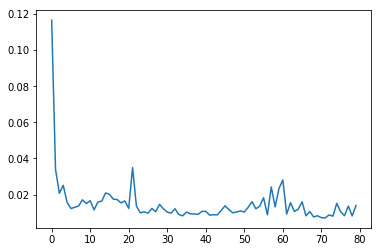

In [50]:
plt.plot(history.history['mean_squared_error'])

In [12]:
model.load_weights("../next_day_lstm")

In [13]:
train_mse, _ = model.evaluate(x_train, y_train)
print("LSTM Train RMSE: {}",format(math.sqrt(train_mse)))

1051/1051 [==============================] - 1s 1ms/step
LSTM Train RMSE: {} 0.07284657686427373


In [14]:
mse, _ = model.evaluate(x_test, y_test)
print("LSTM Test RMSE: {}".format(math.sqrt(mse)))

429/429 [==============================] - 1s 2ms/step
LSTM Test RMSE: 0.06880553031818532


In [52]:
predicted = model.predict(x_test)

In [53]:
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y_test.reshape(-1,1)).reshape(-1)

In [54]:
dates = dates[:100]
date_ticks = dates[:100:10]
actual = actual[:100]
predicted = predicted[:100]

Text(0.5,1,'LSTM Model - Next Day Prediction')

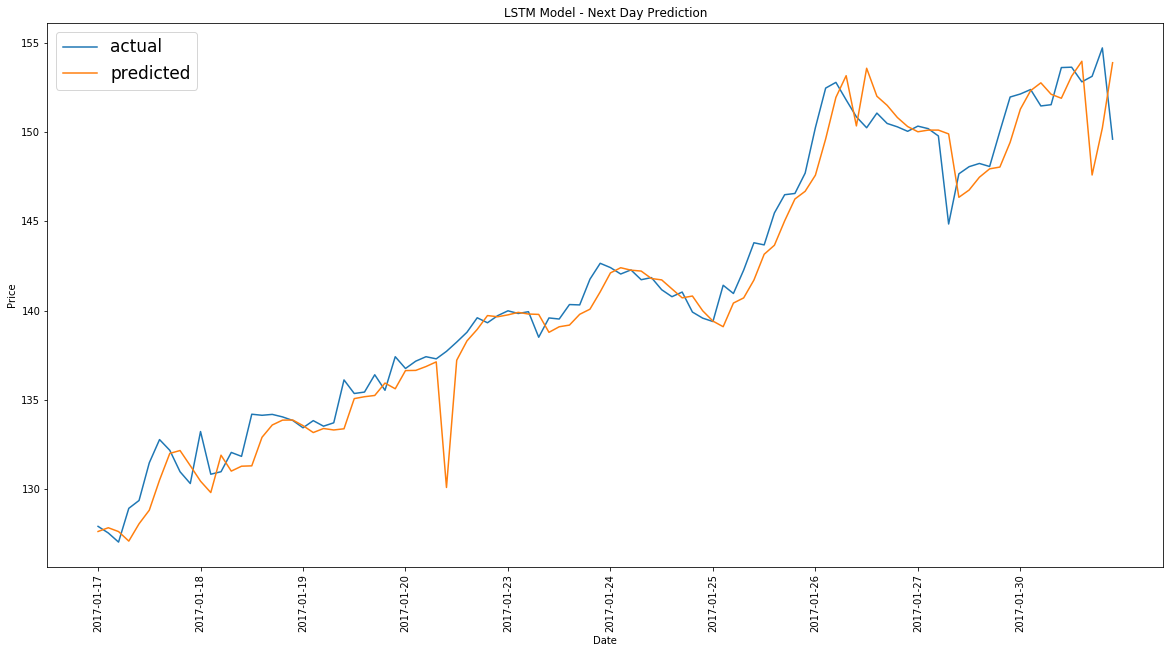

In [55]:
plt.figure(figsize=(20,10))
plt.plot(dates, actual, label='actual')
plt.plot(dates, predicted, label='predicted')
plt.ylabel("Price")
plt.xticks(date_ticks, rotation=90)
plt.xlabel("Date")
plt.legend(prop={'size': 17})
plt.title("LSTM Model - Next Day Prediction")

In [56]:
model.save_weights("../next_day_lstm")